In [102]:
import matplotlib.pyplot as plt
import math
import matplotlib.patches as mpatches
import numpy as np


class Polygon:
    def __init__(self, xlist: list, ylist: list, color=[1,0,0]):
        self.xlist = xlist
        self.ylist = ylist
        self.color = color
    def display(self):
        plt.fill(self.xlist, self.ylist, c=self.color)

def rect(x1: float,y1: float,x2: float, y2: float, c) -> object:
    r=Polygon([x1,x2,x2,x1], [y1,y1,y2,y2], c)
    return r

def display_flag(canvas: tuple, objects: list, **kwargs):
    plt.figure(figsize=canvas)
        
    if 'debug' in kwargs and kwargs['debug']:
        plt.grid(which='both')
    else:
        plt.axis('off')

        
    for o in objects:
        plt.fill(o.xlist, o.ylist, c=o.color) 
           
def star(xpos: float, ypos: float, radius: float, resolution: int, scale_factor: float, color = [1,1,1]) -> object:
    xc,yc = [],[]
    
    if resolution % 2 == 1:
        resolution += 1
        
    angle = 2 * math.pi / resolution
    
    for i in range(resolution):
        
        loop_radius = radius
        if i % 2 == 1:
            loop_radius *= scale_factor

        xc.append(xpos+math.cos(i*angle) * loop_radius)
        yc.append(ypos+math.sin(i*angle) * loop_radius)
        
    return Polygon(xc, yc, color)


def arc_patch(center: tuple, radius: float, theta1: float, theta2: float, resolution=50) -> list:
    theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
    points = np.vstack((radius*np.cos(theta) + center[0], 
                        radius*np.sin(theta) + center[1]))
    return points.tolist()

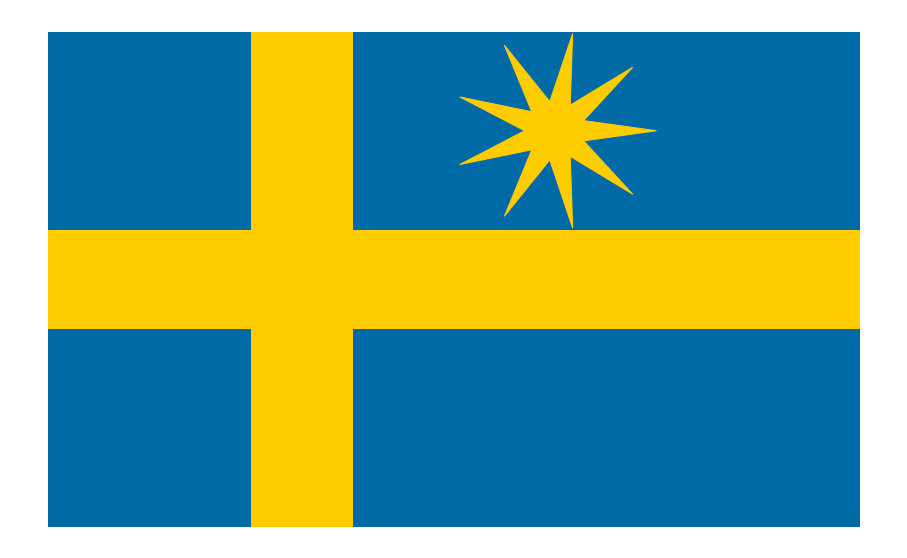

In [103]:
"""
A blue field charged with a yellow Nordic cross that extends to the edges; 
the vertical part of the cross is shifted to the hoist side. 
Dimensions: 5:2:9 horizontally and 4:2:4 vertically.
"""

sweden = []

sweden.append(rect(0,0,16,10,'#006aa7'))
sweden.append(rect(4,0,6,10,'#fecc00'))
sweden.append(rect(0,4,16,6,'#fecc00'))

sweden.append(star(10,8,2,18,.3,'#ffcc00'))

display_flag((16,10), sweden)

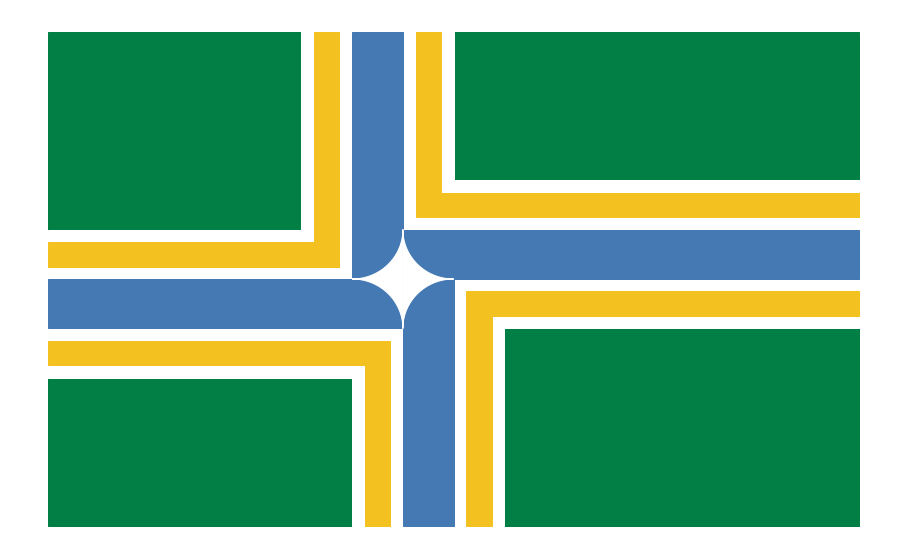

In [105]:
'''
The city flag of Portland, Oregon, 
consists of a green field on which is placed a white four-pointed star (a truncated hypocycloid)
from which radiate blue stripes, each bordered by L-shaped yellow elements.
Narrow white fimbriations separate the blue and yellow elements from each other and from the green background. 
The official ordinance specifies a height of 3 feet and a length of 5 feet.

https://99percentinvisible.org/episode/vexillonaire/
'''

portland_99pi = []

white = '#ffffff'
yellow = '#f3c120'
blue = '#4579b3'

max_x=16
max_y=10

width_white = 3

offset_yellow = .25
width_yellow = .5

offset_blue = offset_yellow

# bg
portland_99pi.append(rect(0,0,max_x,max_y,'#027f45'))

# white horisontal
portland_99pi.append(rect(0,3,6,3+width_white,white)) 
portland_99pi.append(rect(6,4,max_x,4+width_white,white)) 

# white vertical
portland_99pi.append(rect(5,4,5+width_white,max_y,white)) 
portland_99pi.append(rect(6,0,6+width_white,5,white)) 

# yellow horisontal
portland_99pi.append(rect(0,3+width_white-offset_yellow,5+offset_yellow+width_yellow,3+width_white-offset_yellow-width_yellow,yellow)) 
portland_99pi.append(rect(0, 3+offset_yellow, 6+width_yellow, 3+offset_yellow+width_yellow, yellow))

portland_99pi.append(rect(8-width_yellow, 7-offset_yellow, max_x, 7-offset_yellow-width_yellow, yellow))
portland_99pi.append(rect(9-width_yellow, 4+offset_yellow, max_x, 4 +offset_yellow+width_yellow, yellow))

# yellow vertical
portland_99pi.append(rect(5+offset_yellow,3+width_white-offset_yellow,5+offset_yellow+width_yellow,max_y,yellow))
portland_99pi.append(rect(5+width_white-offset_yellow-width_yellow,4+width_white-offset_yellow-width_yellow, 5+width_white-offset_yellow ,max_y,yellow)) 

portland_99pi.append(rect(6+offset_yellow,0,6+offset_yellow+width_yellow,3+offset_yellow+width_yellow,yellow))
portland_99pi.append(rect(6+width_white-width_yellow-offset_yellow,0,6+width_white-offset_yellow,4+offset_yellow+width_yellow,yellow))

# blue parts done as one polygon
blue_polygon_pts = []

blue_polygon_pts.append([0, 3+offset_yellow+width_yellow+offset_blue])
blue_polygon_pts.append([0, 3+width_white-offset_yellow-width_yellow-offset_blue])
blue_polygon_pts.append([5+offset_yellow+width_yellow+offset_blue, 3+width_white-offset_yellow-width_yellow-offset_blue])
blue_polygon_pts.append([5+offset_yellow+width_yellow+offset_blue, max_y])
blue_polygon_pts.append([5+width_white-offset_yellow-width_yellow-offset_blue, max_y])
blue_polygon_pts.append([5+width_white-offset_yellow-width_yellow-offset_blue, 4+width_white-offset_yellow-width_yellow-offset_blue])
blue_polygon_pts.append([max_x,4+width_white-offset_yellow-width_yellow-offset_blue])
blue_polygon_pts.append([max_x,4+offset_yellow+width_yellow+offset_blue])
blue_polygon_pts.append([6+width_white-offset_yellow-width_yellow-offset_blue,4+offset_yellow+width_yellow+offset_blue])
blue_polygon_pts.append([6+width_white-offset_yellow-width_yellow-offset_blue,0])
blue_polygon_pts.append([6+offset_yellow+width_yellow+offset_blue,0])
blue_polygon_pts.append([6+offset_yellow+width_yellow+offset_blue,3+offset_yellow+width_yellow+offset_blue])

blue_polygon_x_list = [n[0] for n in blue_polygon_pts]
blue_polygon_y_list = [n[1] for n in blue_polygon_pts]

blue_polygon = Polygon(blue_polygon_x_list, blue_polygon_y_list, blue)

portland_99pi.append(blue_polygon)

# White patch in middle

patch_args = []
patch_args.append([(6,4), 1, 90, 0])
patch_args.append([(6,6), 1, 270, 360])
patch_args.append([(8,4), 1, 90, 180])
patch_args.append([(8,6), 1, 180, 270])

for arc in patch_args:
    x_coords, y_coords = arc_patch(*arc)
    
    # Add centroid
    x_coords.append(7)
    y_coords.append(5)
    
    portland_99pi.append(Polygon(x_coords, y_coords, '#ffffff'))

display_flag((max_x,max_y), portland_99pi, debug=False)


